<a href="https://colab.research.google.com/github/Alanmc021/melbourne-housing/blob/main/ELT574_ES119694_Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#"Melbourne Housing Snapshot":

Introdução ao Dataset "Melbourne Housing Snapshot"
O Melbourne Housing Snapshot contém informações sobre transações de imóveis em Melbourne, Austrália. O dataset inclui variáveis como o preço de venda, número de quartos, tipo de propriedade e localização. Ele é utilizado para análises e previsões de preços no mercado imobiliário de Melbourne.



In [17]:
# Montando o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo no Google Drive
file_path = '/content/drive/My Drive/melb_data.csv'

# Carregando o arquivo CSV no DataFrame
df = pd.read_csv(file_path)

# Visualizando os primeiros dados
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Limpeza e tratamento de dados
Adicione o código para tratar os valores ausentes e verificar os tipos de dados.

In [18]:
# Excluindo linhas com valores nulos nas colunas principais
df = df.dropna(subset=['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea'])

# Convertendo valores não numéricos, se necessário
df.info()

# Exibindo resumo estatístico
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 7101 entries, 1 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         7101 non-null   object 
 1   Address        7101 non-null   object 
 2   Rooms          7101 non-null   int64  
 3   Type           7101 non-null   object 
 4   Price          7101 non-null   float64
 5   Method         7101 non-null   object 
 6   SellerG        7101 non-null   object 
 7   Date           7101 non-null   object 
 8   Distance       7101 non-null   float64
 9   Postcode       7101 non-null   float64
 10  Bedroom2       7101 non-null   float64
 11  Bathroom       7101 non-null   float64
 12  Car            7101 non-null   float64
 13  Landsize       7101 non-null   float64
 14  BuildingArea   7101 non-null   float64
 15  YearBuilt      6830 non-null   float64
 16  CouncilArea    6446 non-null   object 
 17  Lattitude      7101 non-null   float64
 18  Longtitude  

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,7101.000000,7.101000e+03,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,6830.000000,7101.000000,7101.000000,7101.000000
mean,2.979299,1.078628e+06,10.167216,3104.366850,2.952401,1.601183,1.611182,490.253063,152.128903,1964.444070,-37.808002,144.991742,7431.947472
std,0.971709,6.749127e+05,6.021550,91.929069,0.971851,0.720969,0.945223,1038.236305,542.109910,37.706332,0.080248,0.105231,4347.299919
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,165.000000,93.000000,1940.000000,-37.856800,144.925380,4385.000000
50%,3.000000,8.905000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,401.000000,126.000000,1970.000000,-37.802300,144.997000,6567.000000
75%,4.000000,1.330000e+06,13.000000,3148.000000,4.000000,2.000000,2.000000,640.000000,174.000000,2000.000000,-37.756710,145.056300,10175.000000
max,8.000000,9.000000e+06,48.100000,3977.000000,9.000000,8.000000,10.000000,44500.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


# Criação de variável derivada
Crie uma nova variável baseada em outras variáveis do dataset, como a densidade por área (número de cômodos por área construída).

In [19]:
# Criando a variável derivada
df['Rooms_per_BuildingArea'] = df['Rooms'] / df['BuildingArea']

# Verificando a nova variável
df[['Rooms', 'BuildingArea', 'Rooms_per_BuildingArea']].head()


,Rooms,BuildingArea,Rooms_per_BuildingArea
1,2,79.0,0.025316
2,3,150.0,0.020000
4,4,142.0,0.028169
6,3,210.0,0.014286
7,2,107.0,0.018692


# Cálculo do coeficiente de correlação linear
Calcule o coeficiente de correlação entre a variável derivada e o preço.

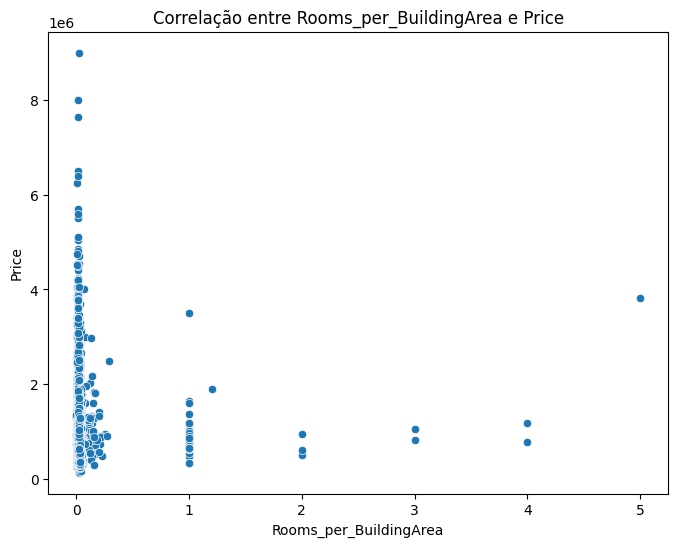

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Rooms_per_BuildingArea'], y=df['Price'])
plt.title('Correlação entre Rooms_per_BuildingArea e Price')
plt.xlabel('Rooms_per_BuildingArea')
plt.ylabel('Price')
plt.show()


# Análise e explicação da correlação
Adicione uma célula de texto no notebook e explique:

O grau de correlação observado: Analise se o coeficiente de correlação indica uma relação forte, moderada ou fraca.
O que isso pode significar: Discuta por que a variável derivada pode ou não influenciar diretamente no preço dos imóveis.


Com base no gráfico fornecido, seguem as possíveis análises sobre a relação entre a variável derivada Rooms_per_BuildingArea e o preço (Price):

1. Grau de correlação observado
O gráfico apresenta uma concentração significativa de pontos em valores baixos de Rooms_per_BuildingArea e mostra pouca dispersão que indique uma relação linear clara entre as variáveis. Considerando isso, é provável que o coeficiente de correlação seja fraco ou quase inexistente. Isso indica que a variável derivada Rooms_per_BuildingArea não apresenta uma relação forte ou consistente com o preço dos imóveis.

2. Significado da correlação
Por que pode não influenciar diretamente no preço:

A razão Rooms_per_BuildingArea pode não ser um bom indicador isolado do preço dos imóveis. Por exemplo, imóveis com mais cômodos em áreas pequenas (valores altos de Rooms_per_BuildingArea) podem não ter um valor significativamente maior devido a outros fatores, como localização, idade do imóvel ou qualidade da construção.
Além disso, valores extremos ou outliers podem estar interferindo na análise, tornando a relação menos evidente.
Fatores adicionais a considerar:

O preço do imóvel geralmente depende de variáveis mais complexas, como localização, tamanho do terreno (Landsize), proximidade de serviços e demanda no mercado.
A relação pode ser não linear, o que justificaria a ausência de uma correlação forte nesse gráfico de dispersão.
